# Разработка системы распознавания предметов интерьера в потоковом видео

## Часть 2: Выявление частоты классов в датасете

In [1]:
%matplotlib inline

#System
import os
import shutil
import random

#Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from skimage.io import imread, imshow

#Seed
seed = 99
np.random.seed(seed)
random.seed(seed)

In [2]:
from scripts_.PathFinder import PathFinder
from scripts_.SegEncoder import SegEncoder
from scripts_.ClassList import ClassList

pf = PathFinder()
se = SegEncoder()

img_dir = 'data/ADE20K_filtred/images/'

### 1. Класс для работы с данными

Напишем класс для работы с данными

Выделим все объекты из папки, сортируем их по количествую вхождений, установив порог для минимального числа вхождений

In [3]:
%%time
cl = ClassList(img_dir, min_obj=50, progress_step=500)

Size: 7166
Done: 500
Done: 1000
Done: 1500
Done: 2000
Done: 2500
Done: 3000
Done: 3500
Done: 4000
Done: 4500
Done: 5000
Done: 5500
Done: 6000
Done: 6500
Done: 7000
CPU times: user 3min 7s, sys: 28.4 s, total: 3min 35s
Wall time: 3min 35s


In [4]:
cl.size()

193

### 2. Удаление лишних классов

In [5]:
rm_class_list = []


#слишком частые классы
rm_class_list.append("wall")
rm_class_list.append("floor, flooring")
rm_class_list.append("ceiling")


#слишком сложные классы
rm_class_list.append("windowpane, window")
rm_class_list.append("box")
rm_class_list.append("mirror")
rm_class_list.append("basket, handbasket")
rm_class_list.append("blind, screen")
rm_class_list.append("spotlight, spot")
rm_class_list.append("railing, rail")
rm_class_list.append("seat")
rm_class_list.append("doorframe, doorcase")
rm_class_list.append("screen door, screen")
rm_class_list.append("beam")
rm_class_list.append("grill, grille, grillwork")
rm_class_list.append("rod")
rm_class_list.append("sky")
rm_class_list.append("rack")
rm_class_list.append("pane, pane of glass, window glass")
rm_class_list.append("shutter")
rm_class_list.append("machine")
rm_class_list.append("skylight, fanlight")
rm_class_list.append("piano, pianoforte, forte-piano")                    
rm_class_list.append("fireplace, hearth, open fireplace")
rm_class_list.append("double door")
rm_class_list.append("heater, warmer")
rm_class_list.append("chest")
rm_class_list.append("paper")
rm_class_list.append("document, written document, papers")
rm_class_list.append("notebook")
rm_class_list.append("booklet, brochure, folder, leaflet, pamphlet")
rm_class_list.append("board, plank")
rm_class_list.append("teapot")
rm_class_list.append("bannister, banister, balustrade, balusters, handrail")
rm_class_list.append("vent, venthole, vent-hole, blowhole")
rm_class_list.append("toaster")
rm_class_list.append("bulletin board, notice board")
rm_class_list.append("microphone, mike")
rm_class_list.append("partition, divider")
rm_class_list.append('ottoman, pouf, pouffe, puff, hassock')
rm_class_list.append('blanket, cover')
rm_class_list.append('shower')
rm_class_list.append('step, stair')
rm_class_list.append("bar")
rm_class_list.append('booth, cubicle, stall, kiosk')
rm_class_list.append('screen, silver screen, projection screen')
rm_class_list.append('shower stall, shower bath')
rm_class_list.append('eiderdown, duvet, continental quilt')
rm_class_list.append('poster, posting, placard, notice, bill, card')
rm_class_list.append("buffet, counter, sideboard")
rm_class_list.append('drawer')
rm_class_list.append('fluorescent, fluorescent fixture')
rm_class_list.append('faucet, spigot')


#бесполезные
rm_class_list.append('curtain, drape, drapery, mantle, pall')
rm_class_list.append("bottle")
rm_class_list.append("plate")
rm_class_list.append("glass, drinking glass")
rm_class_list.append("towel")
rm_class_list.append("bowl")
rm_class_list.append("plaything, toy")
rm_class_list.append("column, pillar")
rm_class_list.append("figurine, statuette")
rm_class_list.append("tray")
rm_class_list.append("jar")
rm_class_list.append("fruit")
rm_class_list.append("mug")
rm_class_list.append("pool ball")
rm_class_list.append("pool table, billiard table, snooker table")
rm_class_list.append("bag")
rm_class_list.append("pitcher, ewer")
rm_class_list.append("cup")
rm_class_list.append("bucket, pail")
rm_class_list.append("knife")
rm_class_list.append("ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin")
rm_class_list.append("tree")
rm_class_list.append("can, tin, tin can")
rm_class_list.append("sculpture")
rm_class_list.append("cue, cue stick, pool cue, pool stick")
rm_class_list.append("soap dispenser")
rm_class_list.append("teacup")
rm_class_list.append("food, solid food")
rm_class_list.append("pottery, clayware")
rm_class_list.append("arcade machine")
rm_class_list.append("ball")
rm_class_list.append("hanger")
rm_class_list.append("towel rack, towel horse")
rm_class_list.append("soap")
rm_class_list.append("bouquet, corsage, posy, nosegay")
rm_class_list.append("canister, cannister, tin")
rm_class_list.append("bag, handbag, pocketbook, purse")
rm_class_list.append("fork")
rm_class_list.append("pipe, pipage, piping")
rm_class_list.append("saucepan")
rm_class_list.append("soap dish")
rm_class_list.append("ashtray")
rm_class_list.append("bag, traveling bag, travelling bag, grip, suitcase")
rm_class_list.append("building, edifice")
rm_class_list.append("spoon")
rm_class_list.append("coffee cup")
rm_class_list.append("backpack, back pack, knapsack, packsack, rucksack, haversack")
rm_class_list.append("vase")
rm_class_list.append("pot, flowerpot")
rm_class_list.append("pot")
rm_class_list.append("chandelier, pendant, pendent")
rm_class_list.append("shoe")
rm_class_list.append("toilet tissue, toilet paper, bathroom tissue")
rm_class_list.append("signboard, sign")
rm_class_list.append("dishrag, dishcloth")
rm_class_list.append("paper towel")
rm_class_list.append("hat, chapeau, lid")
rm_class_list.append('napkin, table napkin, serviette')
rm_class_list.append('place mat')


#мало пикселей
rm_class_list.append("wall socket, wall plug, electric outlet, electrical outlet, outlet, electric receptacle")
rm_class_list.append("sconce")
rm_class_list.append("candlestick, candle holder")
rm_class_list.append("switch, electric switch, electrical switch")
rm_class_list.append("telephone, phone, telephone set")
rm_class_list.append("candle, taper, wax light")
rm_class_list.append("pen")
rm_class_list.append("remote control, remote")
rm_class_list.append("candelabrum, candelabra")
rm_class_list.append("spectacles, specs, eyeglasses, glasses")
rm_class_list.append("light bulb, lightbulb, bulb, incandescent lamp, electric light, electric-light bulb")
rm_class_list.append('light, light source')


#уменьшение датасета
rm_class_list.append('clock')
rm_class_list.append('mousepad, mouse mat')
rm_class_list.append('keyboard')
rm_class_list.append('lamp')
rm_class_list.append('book')
rm_class_list.append("magazine")
rm_class_list.append('shelf')
rm_class_list.append('bookcase')
rm_class_list.append('flower')
rm_class_list.append('coffee maker')
rm_class_list.append("kettle, boiler")
rm_class_list.append('system')
rm_class_list.append('stairs, steps')
rm_class_list.append('air conditioner, air conditioning')
rm_class_list.append('radiator')
rm_class_list.append('fan')

In [6]:
cl.remove_classes(rm_class_list)

[]

In [7]:
cl.size()

53

### 3. Объединение классов

In [8]:
jo_class_list = []

jo_class_list.append(['drawing', 'painting, picture'])
jo_class_list.append(['tapestry, tapis', 'painting, picture'])

jo_class_list.append(['desk', 'table'])

jo_class_list.append(['cushion', 'pillow'])

jo_class_list.append(['work surface', 'counter'])
jo_class_list.append(['kitchen island', 'counter'])
jo_class_list.append(['countertop', 'counter'])

jo_class_list.append(['television receiver, television, television set, tv, tv set, idiot box, boob tube, telly, goggle box' , 'monitor, monitoring device'])
jo_class_list.append(['screen, crt screen' , 'monitor, monitoring device'])

jo_class_list.append(['shirt', 'apparel, wearing apparel, dress, clothes'])
jo_class_list.append(['trouser, pant', 'apparel, wearing apparel, dress, clothes'])
jo_class_list.append(['jacket', 'apparel, wearing apparel, dress, clothes'])
jo_class_list.append(['sweater, jumper', 'apparel, wearing apparel, dress, clothes'])

In [9]:
cl.join_list(jo_class_list)

[]

In [10]:
cl.size()

40

### Визуализация предметов

In [13]:
def get_flatten_class_list():
    flat = []
    for megaclass in cl.class_list:
        for class_name in megaclass:
            flat.append(class_name)
            
    return flat

In [14]:
cl_flat = get_flatten_class_list()
cl_flat.remove('-')

In [15]:
len(cl_flat)

53

In [16]:
%%time
hw_all = se.get_hw_dict(dir_path=img_dir, class_list=cl_flat,
                        max_num=3, skip_probably=0.5, progress_bar=True)

Done: 1
0; 0; 0; 0; 1; 0; 0; 1; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 
Done: 2
0; 0; 0; 1; 1; 1; 0; 1; 1; 1; 1; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 
Done: 3
0; 0; 0; 1; 2; 1; 0; 1; 1; 2; 1; 0; 0; 1; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 
Done: 4
0; 1; 0; 1; 3; 1; 0; 1; 1; 2; 1; 0; 0; 1; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 
Done: 5
0; 1; 0; 1; 3; 2; 0; 1; 2; 3; 1; 0; 0; 1; 0; 0; 1; 0; 0; 0; 0; 0; 0; 0; 1; 1; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 
Done: 6
1; 2; 0; 1; 3; 2; 0; 1; 2; 3; 1; 0; 0; 1; 1; 0; 1; 0; 0; 0; 0; 0; 0; 0; 1; 1; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0;

Done: 93
10; 19; 0; 2; 26; 16; 4; 13; 10; 6; 1; 3; 6; 5; 7; 4; 14; 1; 5; 3; 1; 12; 0; 0; 2; 3; 13; 2; 8; 0; 4; 0; 6; 4; 2; 0; 0; 0; 0; 1; 0; 9; 1; 1; 1; 11; 3; 1; 1; 0; 0; 1; 0; 
Done: 95
10; 19; 0; 2; 27; 16; 4; 14; 10; 6; 1; 3; 6; 5; 7; 4; 15; 1; 5; 3; 2; 13; 0; 0; 2; 3; 13; 2; 8; 0; 4; 0; 7; 4; 2; 0; 0; 0; 0; 1; 0; 9; 1; 1; 1; 12; 4; 1; 1; 0; 0; 1; 0; 
Done: 96
10; 19; 0; 2; 28; 16; 4; 14; 10; 6; 1; 3; 6; 5; 7; 4; 16; 1; 5; 3; 2; 13; 0; 0; 2; 3; 14; 2; 8; 0; 4; 0; 8; 4; 3; 0; 0; 0; 0; 1; 0; 9; 1; 1; 1; 13; 4; 1; 1; 0; 0; 1; 0; 
Done: 101
10; 19; 0; 2; 29; 16; 4; 14; 10; 6; 1; 3; 6; 5; 7; 4; 17; 1; 5; 3; 3; 14; 0; 0; 2; 3; 14; 2; 9; 0; 4; 0; 8; 5; 3; 0; 0; 0; 0; 1; 0; 9; 1; 1; 1; 14; 4; 1; 1; 0; 0; 1; 0; 
Done: 104
10; 20; 0; 2; 30; 16; 4; 14; 11; 6; 1; 3; 6; 5; 7; 4; 18; 1; 5; 3; 3; 14; 0; 0; 2; 3; 14; 2; 9; 0; 4; 0; 8; 5; 3; 0; 0; 0; 0; 1; 0; 9; 1; 1; 1; 15; 4; 1; 1; 0; 0; 2; 0; 
Done: 111
10; 20; 0; 2; 30; 16; 4; 15; 12; 6; 1; 3; 6; 6; 7; 4; 18; 1; 5; 3; 3; 14; 0; 0; 2; 4; 14; 2; 

Done: 1105
32; 35; 6; 3; 51; 38; 14; 24; 19; 8; 3; 5; 9; 13; 10; 10; 32; 7; 7; 5; 8; 22; 8; 2; 3; 5; 20; 5; 14; 4; 7; 7; 13; 10; 6; 3; 3; 1; 1; 3; 1; 9; 3; 6; 4; 23; 7; 3; 3; 3; 2; 4; 2; 
Done: 1106
32; 36; 6; 3; 52; 38; 14; 25; 19; 8; 3; 6; 10; 13; 10; 10; 32; 7; 7; 5; 8; 22; 8; 2; 3; 5; 20; 5; 14; 4; 7; 7; 13; 10; 6; 3; 3; 1; 1; 3; 1; 9; 3; 6; 4; 23; 7; 3; 3; 3; 3; 4; 2; 
Done: 1115
32; 37; 6; 3; 52; 38; 14; 25; 19; 8; 3; 7; 11; 13; 10; 10; 32; 7; 7; 5; 8; 22; 8; 3; 4; 5; 20; 6; 14; 4; 7; 7; 13; 10; 6; 3; 3; 1; 1; 3; 1; 9; 3; 6; 4; 23; 7; 3; 3; 3; 4; 4; 2; 
Done: 1119
33; 38; 6; 3; 52; 38; 15; 25; 19; 9; 3; 7; 11; 13; 10; 10; 32; 7; 7; 5; 8; 22; 8; 3; 4; 5; 20; 7; 14; 4; 7; 7; 13; 10; 6; 3; 3; 1; 1; 3; 2; 9; 3; 6; 4; 23; 7; 3; 3; 3; 4; 4; 2; 
Done: 1213
33; 38; 6; 3; 52; 38; 16; 25; 19; 9; 3; 7; 11; 13; 10; 10; 32; 8; 7; 5; 8; 22; 8; 3; 4; 5; 20; 7; 14; 4; 7; 7; 13; 10; 6; 3; 3; 1; 1; 3; 2; 9; 3; 7; 4; 23; 7; 3; 3; 3; 4; 4; 3; 
Done: 1293
34; 38; 6; 3; 52; 38; 17; 25; 19; 10; 4; 7; 1

chair


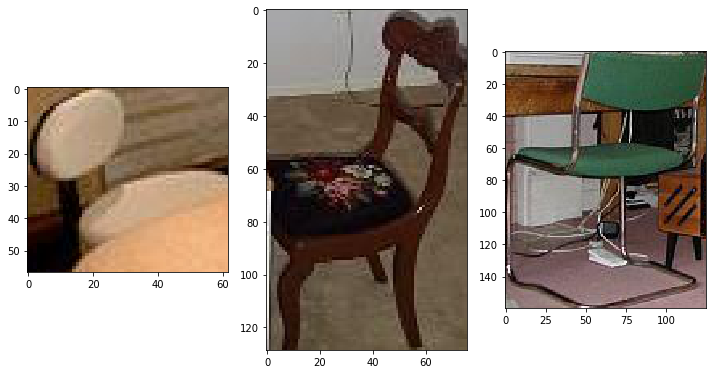

painting, picture


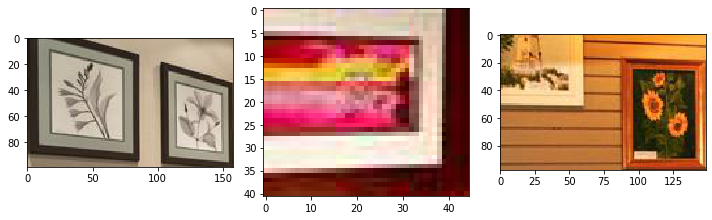

drawing


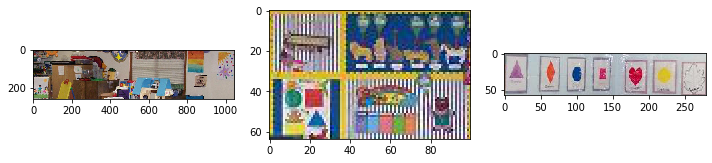

tapestry, tapis


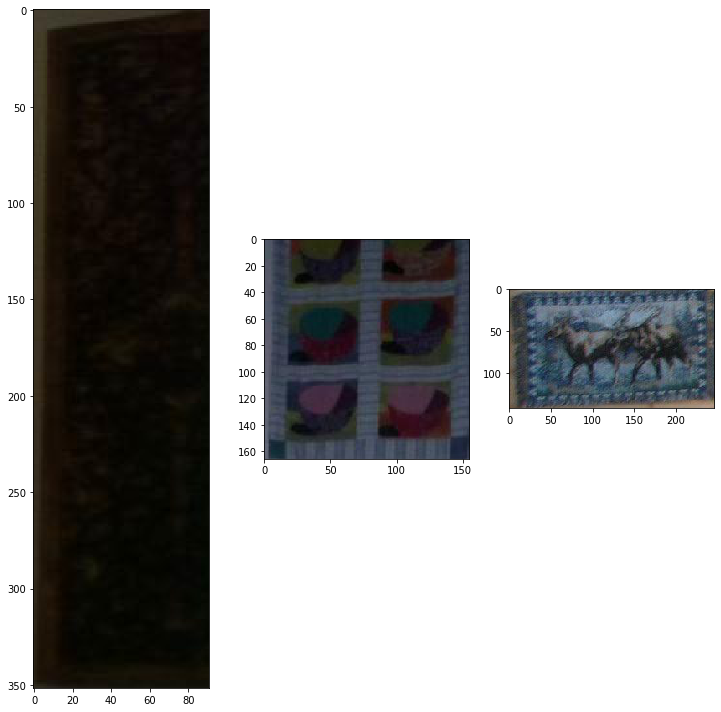

cabinet


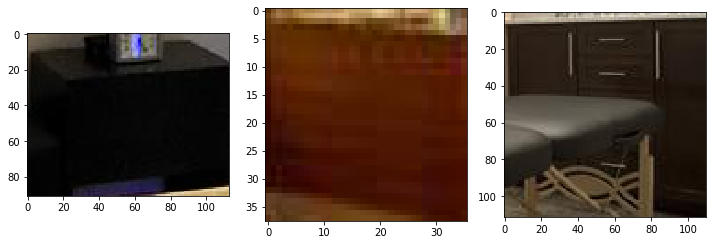

table


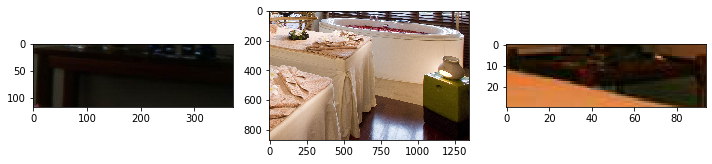

desk


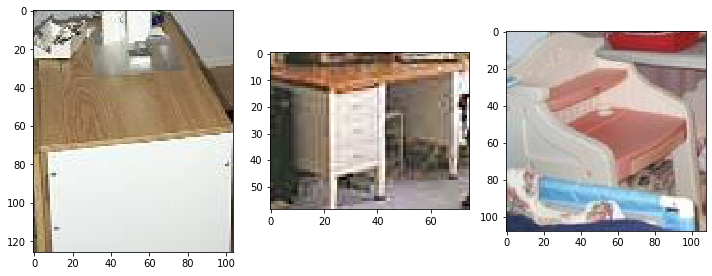

door


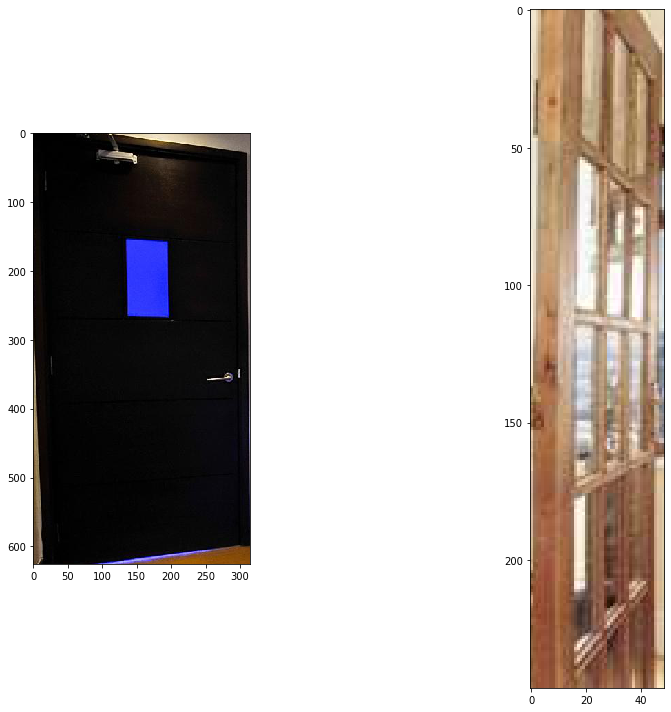

plant, flora, plant life


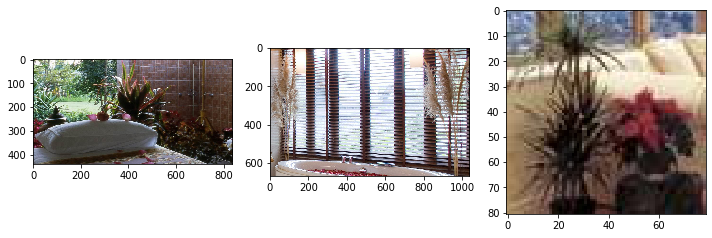

bed


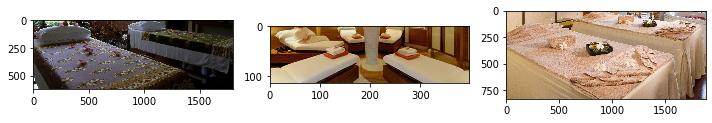

pillow


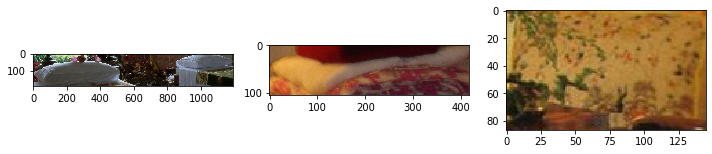

cushion


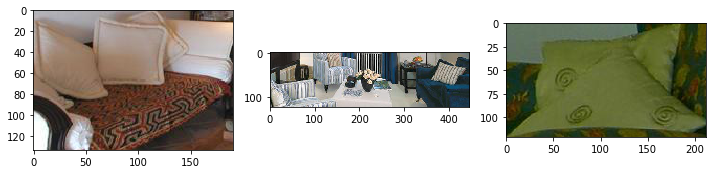

armchair


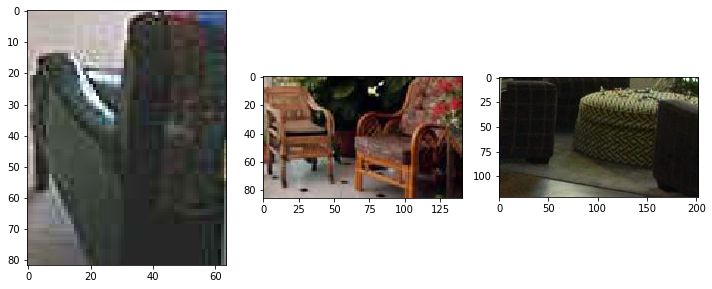

person, individual, someone, somebody, mortal, soul


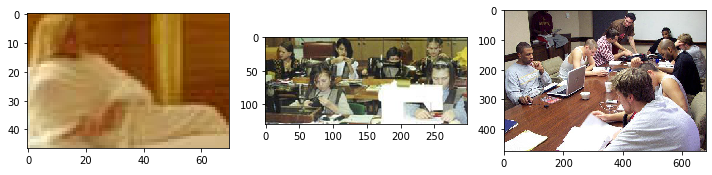

sofa, couch, lounge


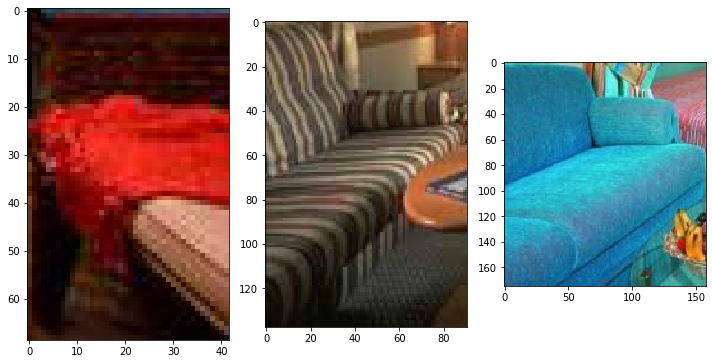

rug, carpet, carpeting


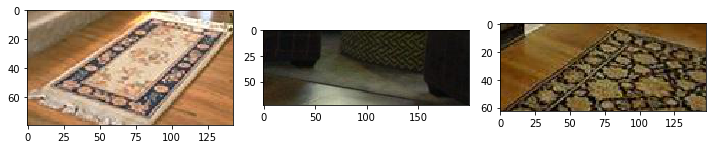

sink


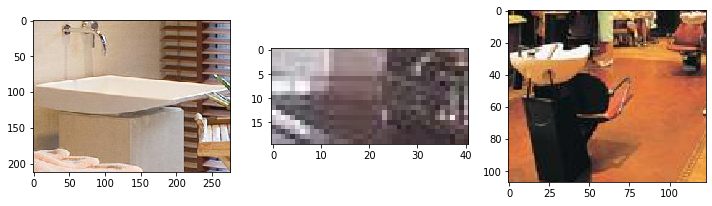

swivel chair


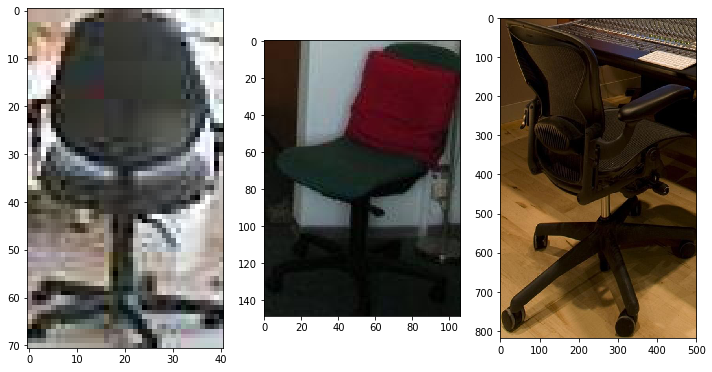

coffee table, cocktail table


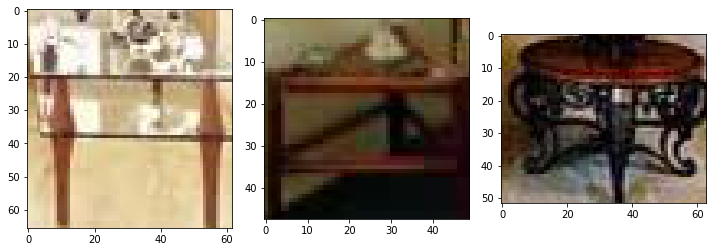

stool


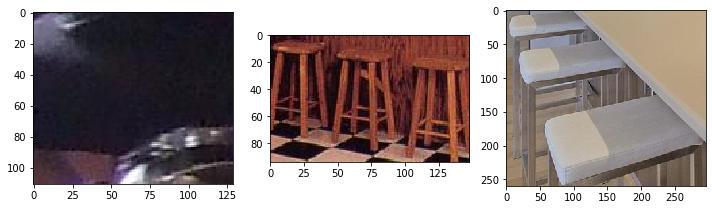

chest of drawers, chest, bureau, dresser


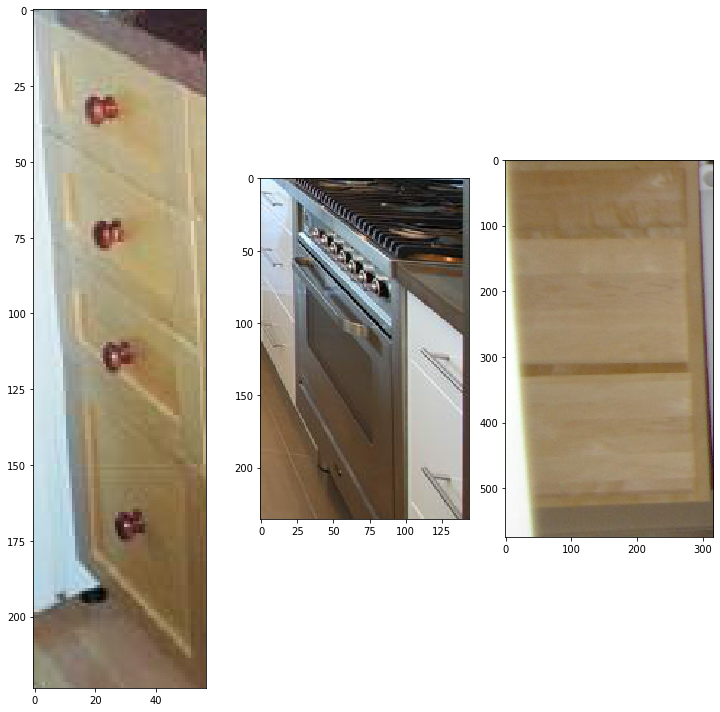

stove, kitchen stove, range, kitchen range, cooking stove


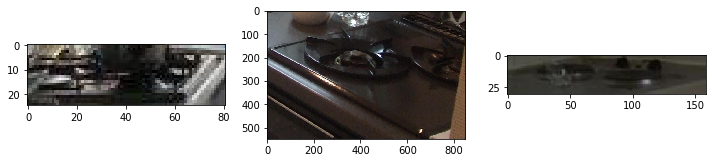

computer, computing machine, computing device, data processor, electronic computer, information processing system


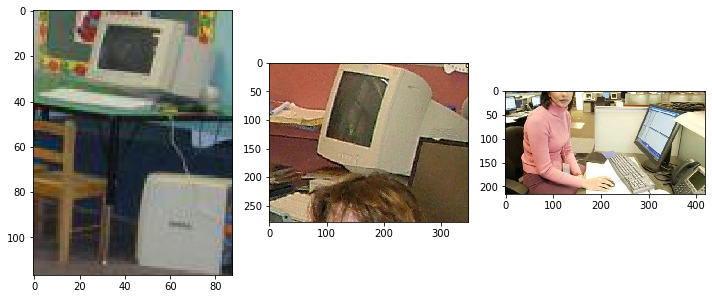

toilet, can, commode, crapper, pot, potty, stool, throne


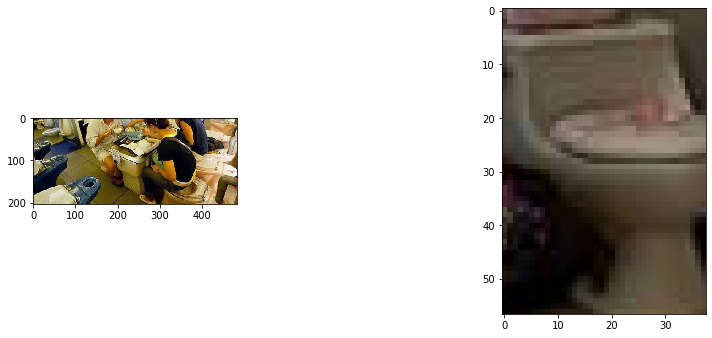

bathtub, bathing tub, bath, tub


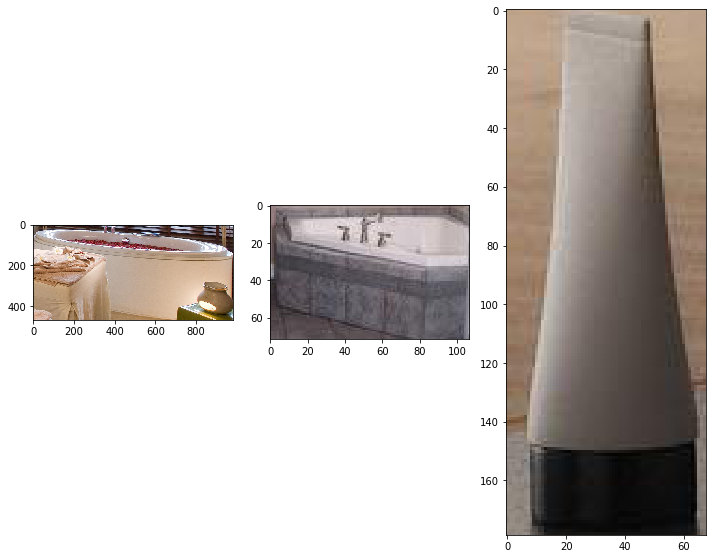

fan


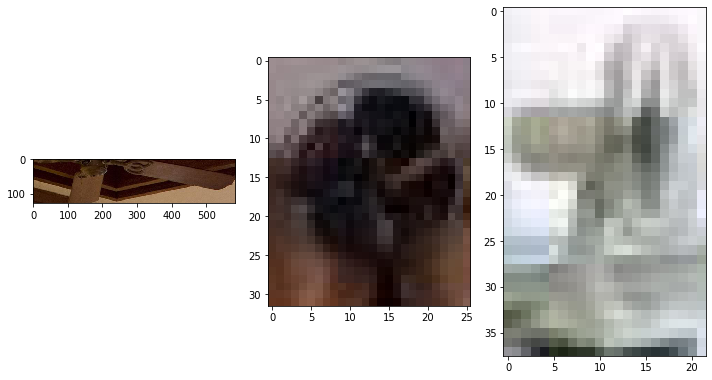

refrigerator, icebox


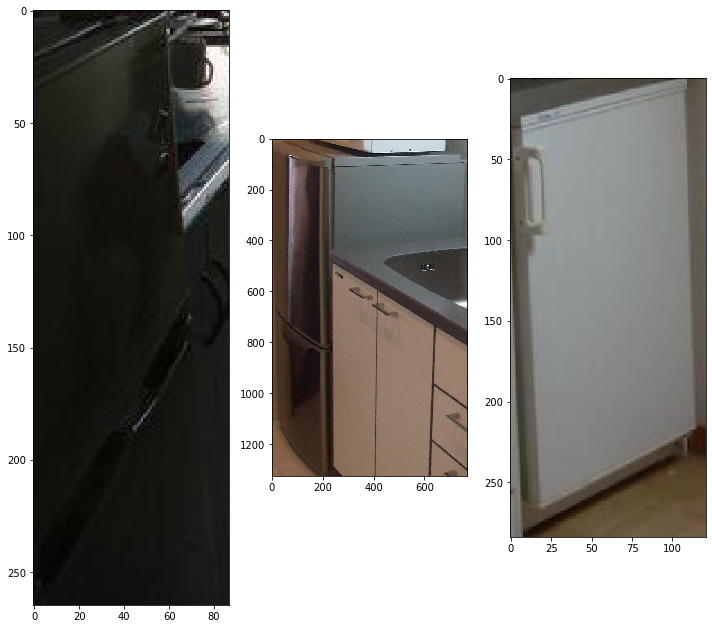

wardrobe, closet, press


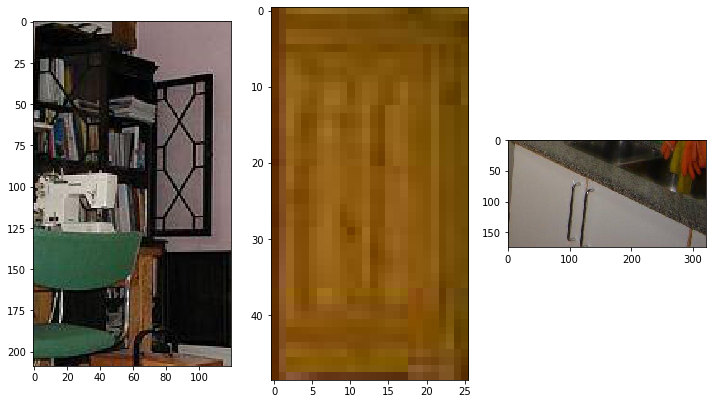

microwave, microwave oven


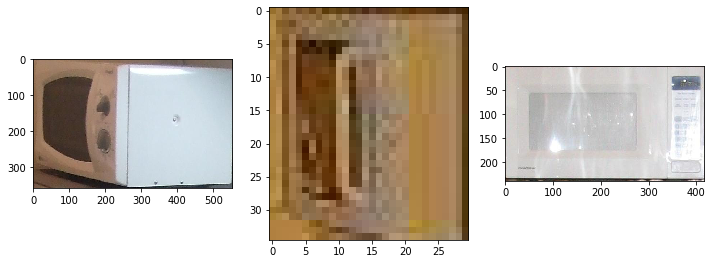

monitor, monitoring device


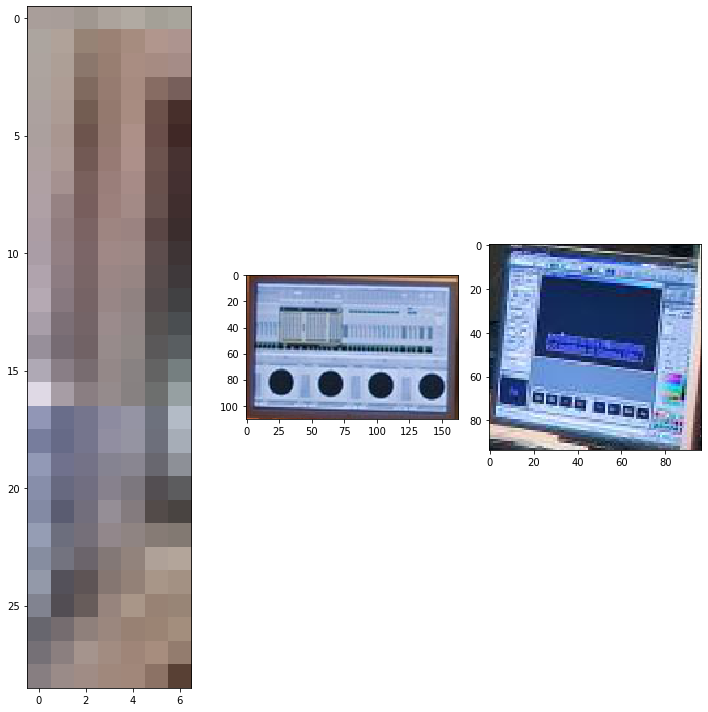

television receiver, television, television set, tv, tv set, idiot box, boob tube, telly, goggle box


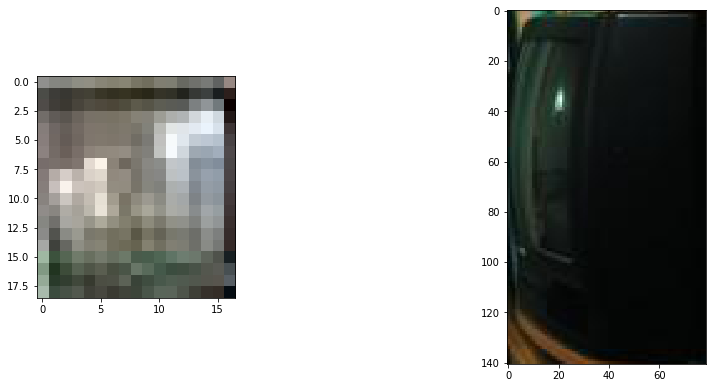

screen, crt screen


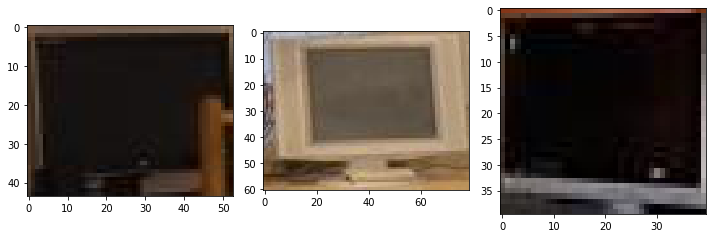

hood, exhaust hood


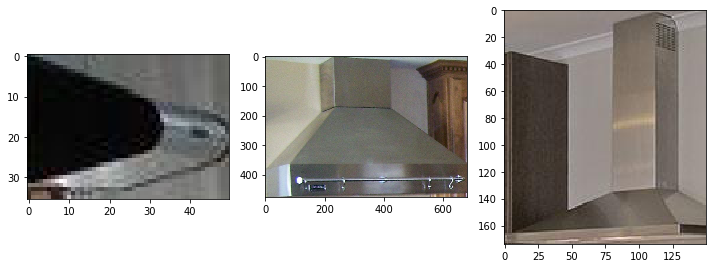

dishwasher, dish washer, dishwashing machine


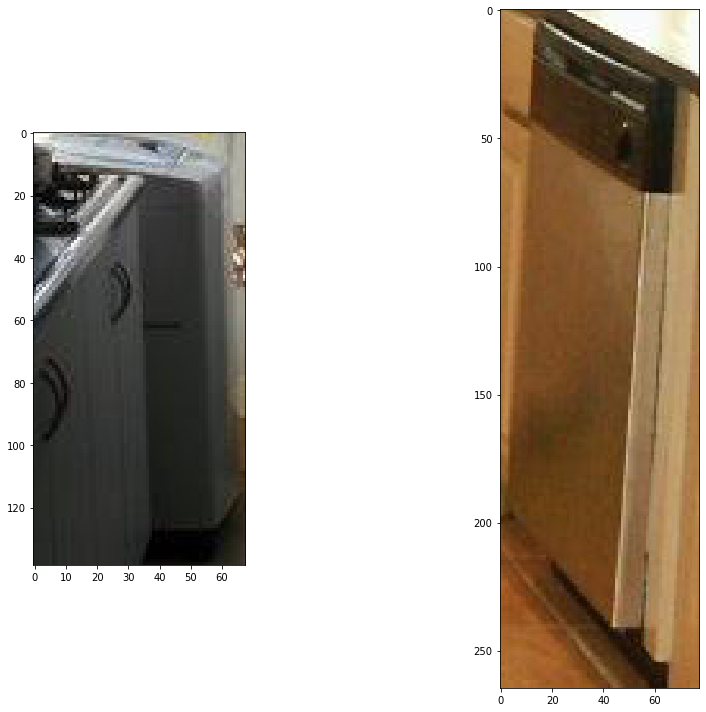

oven


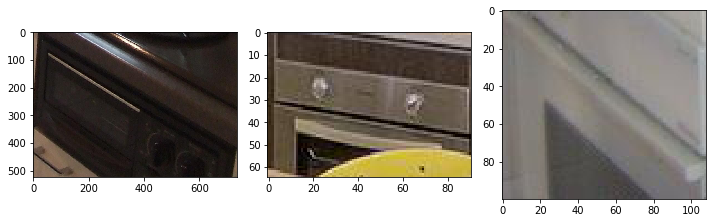

loudspeaker, speaker, speaker unit, loudspeaker system, speaker system


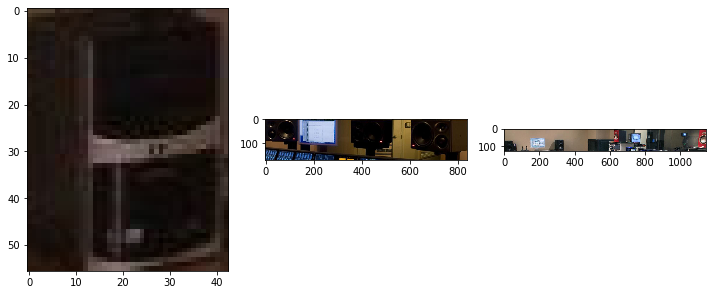

apparel, wearing apparel, dress, clothes


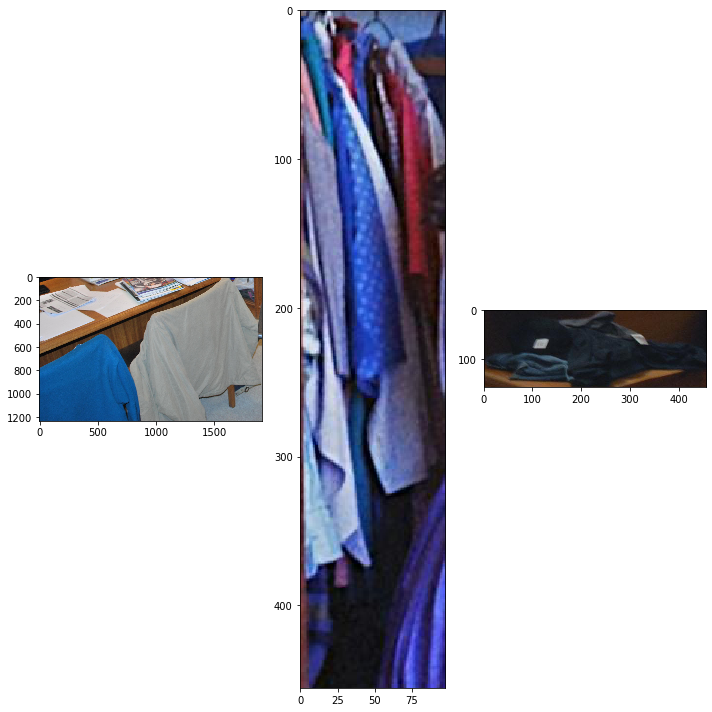

shirt


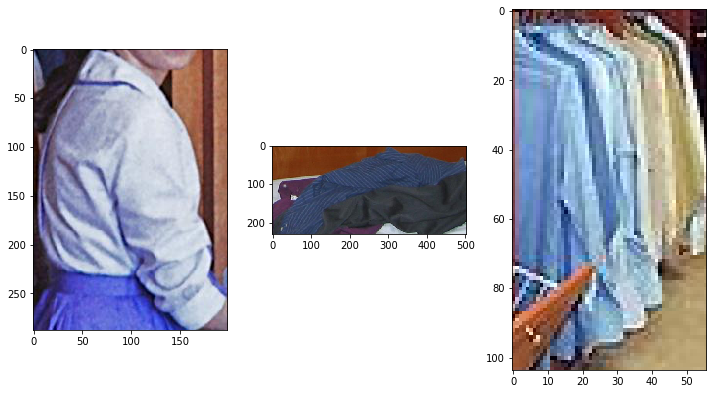

trouser, pant


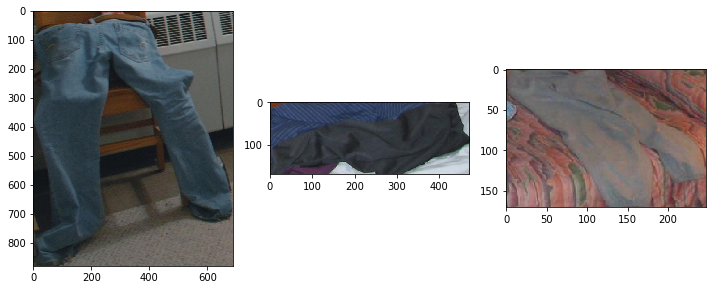

jacket


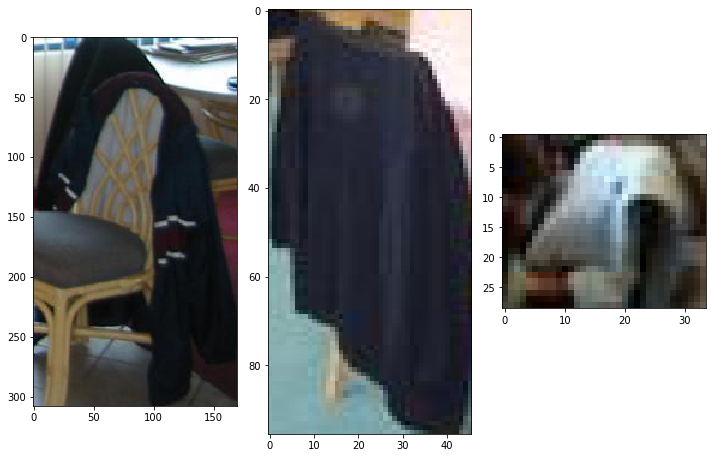

sweater, jumper


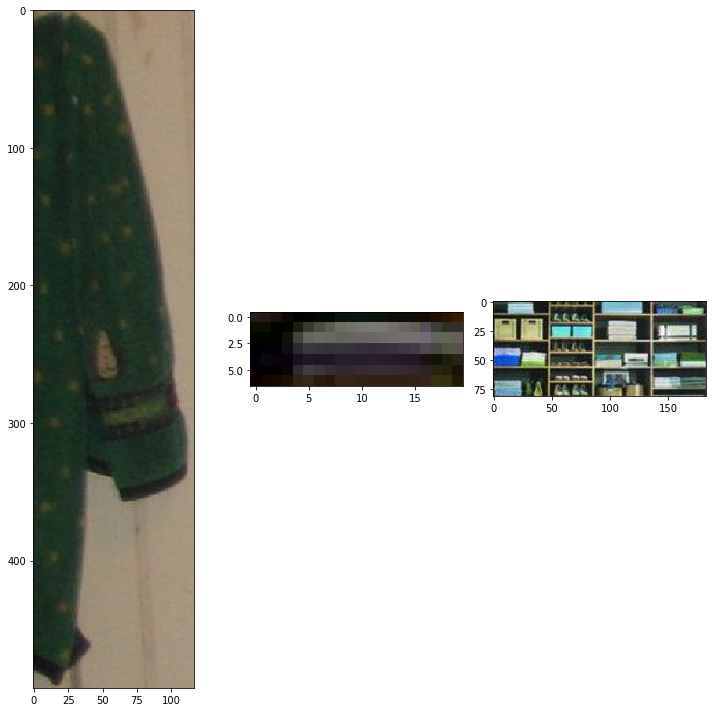

stairway, staircase


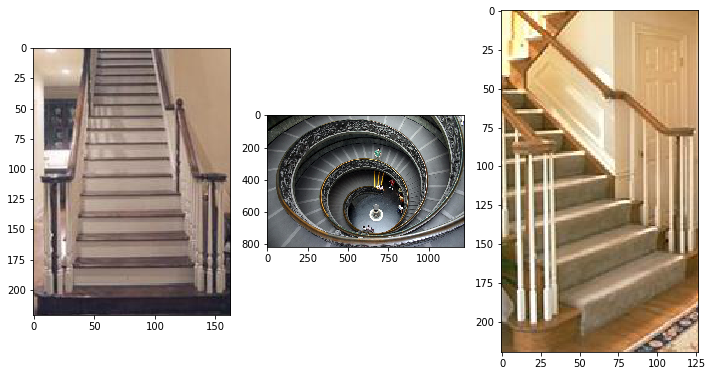

bench


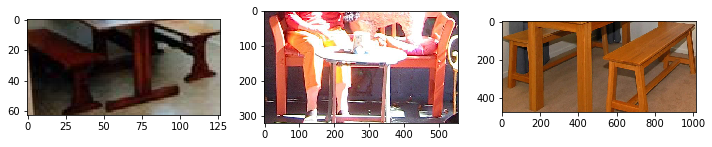

laptop, laptop computer


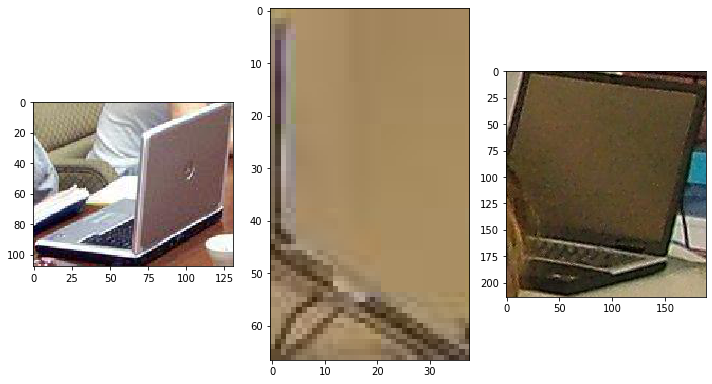

counter


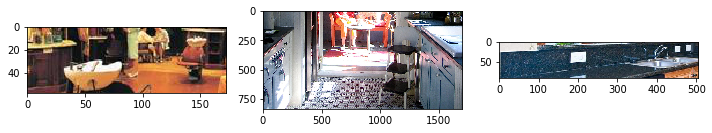

work surface


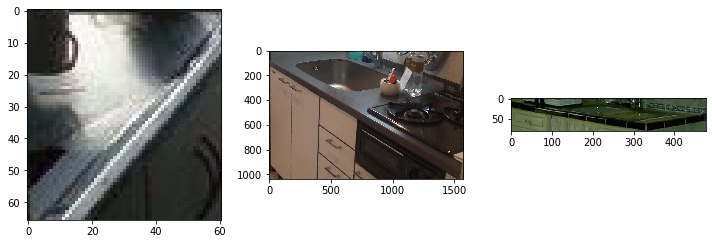

kitchen island


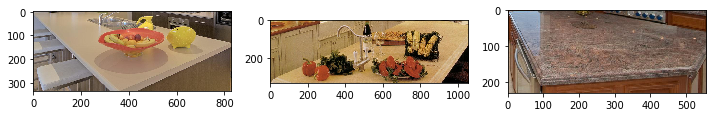

countertop


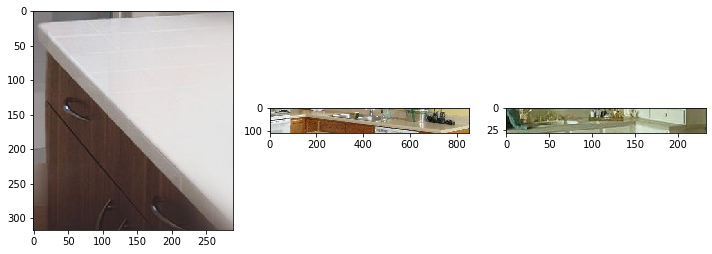

console table, console


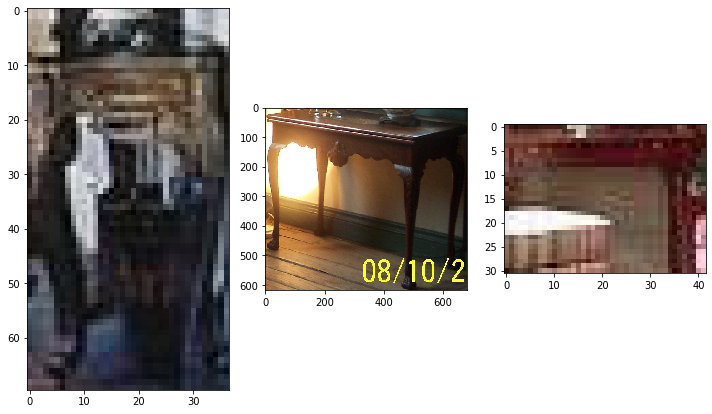

printer


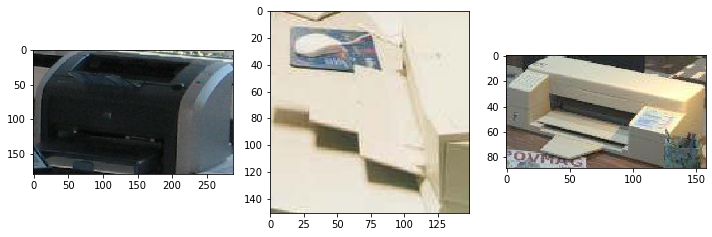

cradle


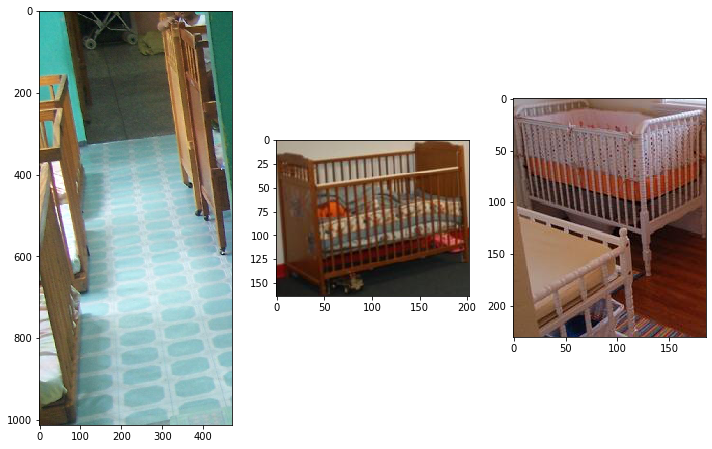

washer, automatic washer, washing machine


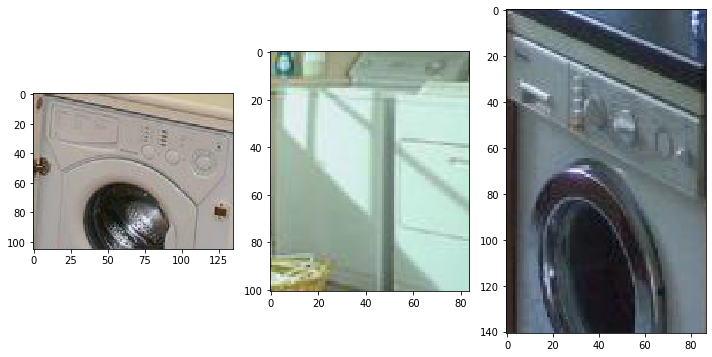

blackboard, chalkboard


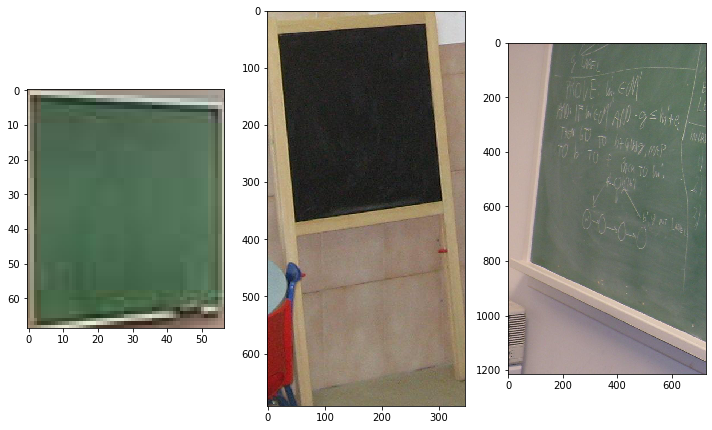

In [17]:
se.show(hw_all, cl_flat, subplot_num=3)

### Сохранение

In [11]:
cl.save_class_list('static/class_list.txt')

### 4. Совмещение с индексами классов

Запишем правила перекодирования классов в файл

In [12]:
cl.save_class_encode('static/class_encode.txt')